<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [4]:
import pandas as pd
import tweepy

In [5]:
# Leer las llaves
keys = pd.read_csv('C:/Users/dcard/OneDrive/Escritorio/NPL/dani.csv', header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [6]:
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
tweets = tweepy.Cursor(api.search,
                       q=['DONALD TRUMP -RT'],
                       lang='en',
                       #geocode='-77.03535, 38.898754,10000km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(100)

In [8]:
# Objeto generador
t = [tweet for tweet in tweets]

In [9]:
t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    #temp.append('Washington')
    #temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)
    
    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'id', 'link']
data.head()

,tweets,date,id,link
0,This is HUGE!! Guess What Donald J Trump and C...,2021-05-26 00:32:31,1397349898199003136,https://twitter.com/i/web/stuatus/139734989819...
1,@crimefield @ituskimurphu @ClutchPointsApp Le’...,2021-05-26 00:32:27,1397349879270109186,https://twitter.com/i/web/stuatus/139734987927...
2,"If our representatives had character, things w...",2021-05-26 00:32:19,1397349846089183233,https://twitter.com/i/web/stuatus/139734984608...
3,"@BeschlossDC Were it not for the car, I'd have...",2021-05-26 00:32:18,1397349843375468544,https://twitter.com/i/web/stuatus/139734984337...
4,@FriendEden100 Newt Gingrich Started the crap...,2021-05-26 00:32:16,1397349832956780548,https://twitter.com/i/web/stuatus/139734983295...


In [10]:
from textblob import TextBlob 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [11]:
data['sentimiento_vader'] = data['tweets'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['tweets'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head()

,tweets,date,id,link,sentimiento_vader,sentimiento_textblob
0,This is HUGE!! Guess What Donald J Trump and C...,2021-05-26 00:32:31,1397349898199003136,https://twitter.com/i/web/stuatus/139734989819...,0.6006,-0.083333
1,@crimefield @ituskimurphu @ClutchPointsApp Le’...,2021-05-26 00:32:27,1397349879270109186,https://twitter.com/i/web/stuatus/139734987927...,0.7650,0.550000
2,"If our representatives had character, things w...",2021-05-26 00:32:19,1397349846089183233,https://twitter.com/i/web/stuatus/139734984608...,0.7745,0.187500
3,"@BeschlossDC Were it not for the car, I'd have...",2021-05-26 00:32:18,1397349843375468544,https://twitter.com/i/web/stuatus/139734984337...,0.0000,0.000000
4,@FriendEden100 Newt Gingrich Started the crap...,2021-05-26 00:32:16,1397349832956780548,https://twitter.com/i/web/stuatus/139734983295...,-0.6124,-0.433333


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [12]:
mm = data.sort_values("sentimiento_vader", ascending = False)
mm.head(1)   #El mas positivo

,tweets,date,id,link,sentimiento_vader,sentimiento_textblob
51,👍🌟👏💥😄💥🌟👏👍😄👍\nNew grand jury seated for next st...,2021-05-26 00:28:35,1397348907521396743,https://twitter.com/i/web/stuatus/139734890752...,0.9694,0.096162


In [69]:
mm.tail(1)  #El mas negativo

,tweets,date,id,link,sentimiento_vader,sentimiento_textblob
89,"All criminals, white collar, thugs, racist terrorist and insurrectionist listen how republicans law makers defend someone who are being investigated by AGs. They wrote the laws &amp;Donald Trump broke the law. republicans congress allowed trump to tells people prosecutors are liars..",2021-05-25 23:33:12,1397334969937182720,https://twitter.com/i/web/stuatus/1397334969937182720,-0.9618,0.0


###  `[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [13]:
len(mm[mm.sentimiento_vader> 0])  #Cantidad de tuits Postivos

33

In [14]:
len(mm[mm.sentimiento_vader< 0])   #Cantidad de tuits Negativos

45

###  `[5 pts]` : Punto 4: Una visualización sobre sus datos

In [20]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

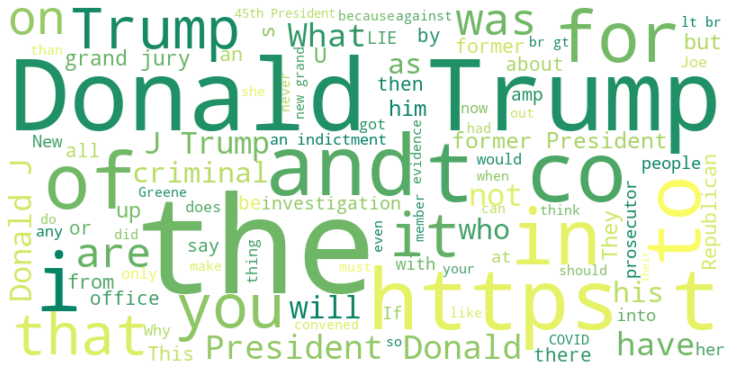

In [24]:
palabras = data.tweets.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="summer",
                      stopwords=stopwords, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()